# Installing and importing necessary libraries

In [69]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install statsmodels
# !pip install -U scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.2/9.2 MB 5.0 MB/s eta 0:00:02
     ---                                      0.8/9.2 MB 10.6 MB/s eta 0:00:01
     ------------                             2.8/9.2 MB 22.3 MB/s eta 0:00:01
     ----------------                         3.8/9.2 MB 24.2 MB/s eta 0:00:01
     ------------------                       4.2/9.2 MB 19.2 MB/s eta 0:00:01
     -----------------------                  5.4/9.2 MB 21.6 MB/s eta 0:00:01
     -------------------------                6.0/9.2 MB 19.0 MB/s eta 0:00:01
     ----------------------------             6.6/9.2 MB 19.2 MB/s eta 0:00:01
     -------------------------------          7.2/9.2 MB 18.4 MB/s eta 0:00:01
     ------------------------------------     8.3/9.2 MB 18.2 MB/s eta 0:00:01
     --------------------------------------   8.8/9.2 MB 17.6 MB/s eta 0:00:01
     ---------------------------------------  9.1/9.2 MB 17.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV

In [2]:
raw = pd.read_csv('Fraud.csv')
raw

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Checking for Null or NaN values

In [3]:
raw.isnull().values.any()

False

In [4]:
raw.info() ## to check the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Showing Difference B/w legit and Fraud Transactions which is less that 1%

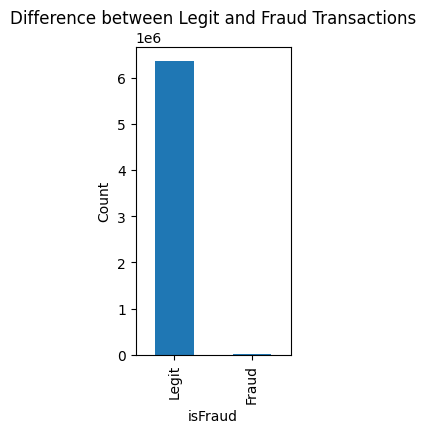

In [28]:
grouped_data = raw.groupby('isFraud').size()
grouped_data.plot(kind='bar',figsize=(2,4))
plt.title('Difference between Legit and Fraud Transactions')
plt.xticks(range(2),('Legit','Fraud'))
plt.ylabel('Count')
plt.show()

# Visualising correlation between independent features , also we can see here i have removed the object values as the cause error with a heat map production

<Axes: >

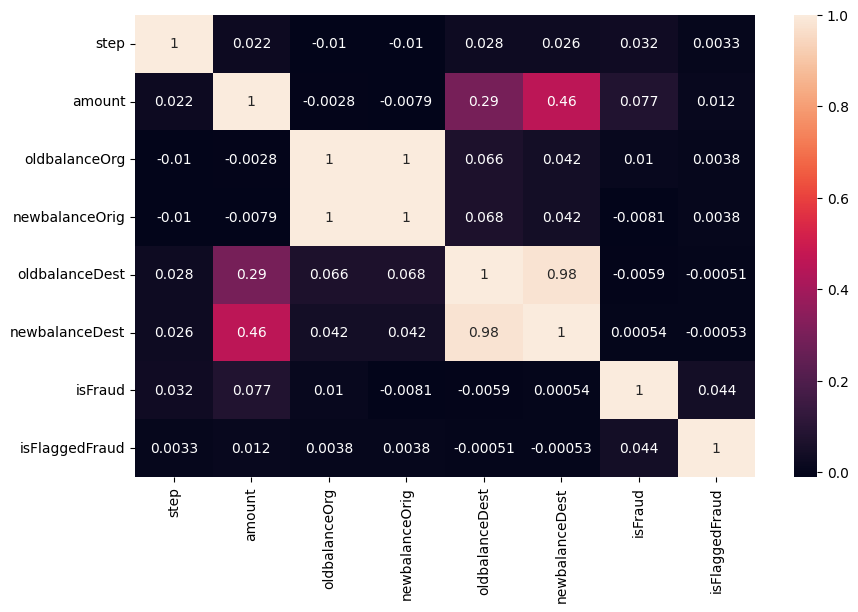

In [6]:
raw2 = raw.drop(['type','nameOrig','nameDest'], axis=1)
corel=raw2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corel,annot=True)

# Pre-Processing The data

In [7]:
raw3 = raw.copy()

# Lable encoding values for Objects 

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

objList = raw3.select_dtypes(include = "object").columns
print (objList)

for feat in objList:
    raw3[feat] = le.fit_transform(raw3[feat].astype(str))
    
    
raw.info()


Index(['type', 'nameOrig', 'nameDest'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# VARIANCE INFLATION FACTOR , removal and adding new feature with the difference of features with high VIF

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Variance(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [10]:
Variance(raw3)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [11]:
raw3['orgn_bal'] = raw3.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
raw3['dest_bal'] = raw3.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
raw3['TransactionPath'] = raw3.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)
raw3


raw3 = raw3.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

# variance after removal of High VIF values

In [12]:
Variance(raw3) 

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,orgn_bal,1.307910
5,dest_bal,3.754335
6,TransactionPath,2.677167


# Correlation of independent Features 

<Axes: >

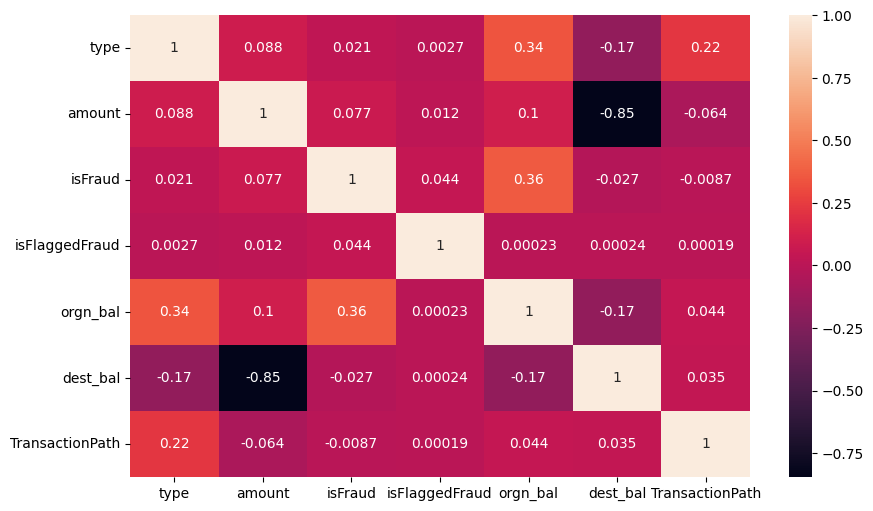

In [13]:
corr=raw3.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# Model Preparation

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Normalization of feature[s] (Amount)

In [15]:
scaler = StandardScaler()
raw3["NormalizedAmount"] = scaler.fit_transform(raw3["amount"].values.reshape(-1, 1))
raw3.drop(["amount"], inplace= True, axis= 1)

## Assigning X and Y values for Train Test Split

In [16]:
Y = raw3["isFraud"]
X = raw3.drop(["isFraud"], axis= 1)

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.25, random_state= 37)

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100
print("Decision Tree Score: ", round(decision_tree_score,2))

Decision Tree Score:  99.92


In [21]:
print("Decision Tree Scores")
true_neg, false_pos, false_neg,true_pos = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {true_pos}')
print(f'False Positives: {false_pos}')
print(f'True Negatives: {true_neg}')
print(f'False Negatives: {false_neg}')

Decision Tree Scores
True Positives: 1418
False Positives: 634
True Negatives: 1588027
False Negatives: 576


In [26]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print(confusion_matrix_dt,)
print("--------------------------------------------------------------------")
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

[[1588027     634]
 [    576    1418]]
--------------------------------------------------------------------
Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588661
           1       0.69      0.71      0.70      1994

    accuracy                           1.00   1590655
   macro avg       0.85      0.86      0.85   1590655
weighted avg       1.00      1.00      1.00   1590655



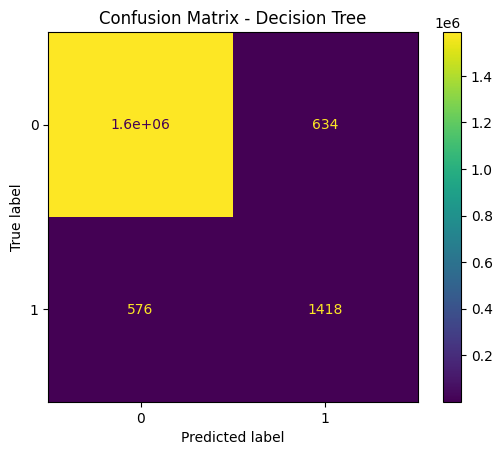

In [27]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
cmd.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# In conclusion

the Decision Tree algorithm is a useful tool for detecting fraud in various industries, including finance, insurance, and e-commerce. By using a series of binary decisions based on the features of a given transaction or activity, the Decision Tree algorithm can effectively identify potentially fraudulent behavior with a high degree of accuracy. 

However, like any machine learning model, the performance of a Decision Tree fraud detection model depends heavily on the quality and quantity of the input data used to train it. It is crucial to ensure that the data is clean, relevant, and appropriately labeled to ensure that the model can accurately identify patterns of fraudulent behavior. 

Additionally, it's essential to continually monitor and update the Decision Tree model as new patterns of fraud emerge or as fraudsters develop new tactics to evade detection. With proper care and attention, a Decision Tree model can be an effective and valuable tool for detecting fraud in real-time, helping to prevent financial losses and protect the integrity of a business.